# Segundo parcial EAP

Nombre: Yessica Abigail Santiago Hernandez

Matricula: 1990002

Grupo: 44


In [360]:
#librerias basicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [361]:
#librerias especializadas
from lifelines import CoxPHFitter, KaplanMeierFitter, ExponentialFitter, WeibullFitter,LogNormalFitter
import seaborn as sns

In [362]:
#base de datos 
bil = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/credit_risk.csv')

In [363]:
bil.head(3)

,saldo_cuenta,meses,historia_crediticia,uso,cantidad,saldo_cuenta_ahorro,años_trabajando,tasa_de_interes,genero_estado_civil,aval,...,activos,edad,planes_de_pago,casa,numero_creditos,situacion_laboral,dependientes_economicos,telefono,extranjero,credito_pagado
0,menor_a_cero,6,no_ha_pagado,TV,1169,NaN,mas_de_7,4,hombre_soltero,NaN,...,bienes_raices,67,NaN,propia,2,gobierno,1,1,1,1
1,cero_a_200,48,pago_algun_credito,TV,5951,menor_100,1_a_4,2,mujer_no_soltera,NaN,...,bienes_raices,22,NaN,propia,1,gobierno,1,0,1,0
2,sin_cuenta,12,no_ha_pagado,colegiaturas,2096,menor_100,4_a_7,2,hombre_soltero,NaN,...,bienes_raices,49,NaN,propia,1,obrero,2,0,1,1


La base de datos proporcionada contiene información relevante sobre cada préstamo. 

1. **"crédito_pagado"**: toma el valor de 1 si el cliente ha pagado completamente el préstamo y 0 si no lo ha hecho o aún no ha terminado de pagar. 

2. **"meses"**: información sobre el tiempo en meses que lleva pagar completamente el préstamo

3. **"cantidad"**: monto del préstamo otorgado en euros

## Analisis exploratorio

1. Cuantas variables y cuantas observaciones tienen la base

In [364]:
#Numero de variables  
var = bil.columns

#numero de observaciones 
obs = bil.count(axis=1)

#respuesta
print(f'El numero de variables es de {len(var)}\nY el numero de observaciones es de {len(obs)}')

El numero de variables es de 21
Y el numero de observaciones es de 1000


2. Cuál es el monto promedio de los créditos otorgados por el banco

In [365]:
mp = bil['cantidad'].mean().round(2)

#respuesta
print(f'El monto promedio de los creditos otorgados por el banco es de {mp}')

El monto promedio de los creditos otorgados por el banco es de 3271.26


3. Cuál es el tiempo promedio que se tardaron en pagar el préstamo los 
que pagaron el préstamo en su totalidad


In [366]:
#base de datos filtrada por los usuarios que ya pagaron 
bilp = bil.query('credito_pagado == 1') 

#tiempo promedio
pt = bilp['meses'].mean().round(2)

#respuesta 
print(f'El promedio de tiempo que se tardaron los clientes en pagar el prestamo es de {pt} meses')

El promedio de tiempo que se tardaron los clientes en pagar el prestamo es de 19.21 meses


4. Cuál es la tasa de interés promedio otorgada por el banco

In [367]:
pi = bil['tasa_de_interes'].mean().round(2)

#respuest
print(f'La tasa de interes promedio que ofrece el banco es de {pi}%')

La tasa de interes promedio que ofrece el banco es de 2.97%


5. Cuál es el monto promedio y la tasa de interés promedio de los que ya pagaron

In [368]:
#monto promedio 
mpp = bilp['cantidad'].mean().round(2)
#tasa promedio 
tpp = bilp['tasa_de_interes'].mean().round(2)

#respuesta 
print(f'El monto promedio en usuarios que ya pagaron su deuda es de: {mpp} unidades monetarias\nLa tasa promedio en usuarios que ya pagaron su deuda es de {tpp}%')

El monto promedio en usuarios que ya pagaron su deuda es de: 2985.46 unidades monetarias
La tasa promedio en usuarios que ya pagaron su deuda es de 2.92%


6. Cuál es el monto promedio y la tasa de interés promedio de los que no han pagado 

In [369]:
#base de datos filtrada por los usuarios que ya pagaron 
bilnp = bil.query('credito_pagado == 0')
#monto promedio 
mpnp = bilnp['cantidad'].mean().round(2)
#tasa promedio 
tpnp = bilnp['tasa_de_interes'].mean().round(2)

#respuesta 
print(f'El monto promedio en usuarios que no han pagado su deuda es de: {mpnp} unidades monetarias\nLa tasa promedio en usuarios que no han pagado su deuda es de {tpnp}%')

El monto promedio en usuarios que no han pagado su deuda es de: 3938.13 unidades monetarias
La tasa promedio en usuarios que no han pagado su deuda es de 3.1%


## Modelo de kaplan-Meier 

In [370]:
#modelo kaplan-Meier
kmbil = KaplanMeierFitter().fit(bil['meses'],bil['credito_pagado'])

kmbil.event_table.head()

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,1000,1000
4.0,6,6,0,0,1000
5.0,1,1,0,0,994
6.0,75,66,9,0,993
7.0,5,5,0,0,918


In [371]:
#funcion de supervivencia de kaplan M.
kmbil.survival_function_


,KM_estimate
timeline,
0.0,1.000000
4.0,0.994000
5.0,0.993000
6.0,0.927000
7.0,0.921951
8.0,0.915892
9.0,0.880510
10.0,0.854824
11.0,0.845544


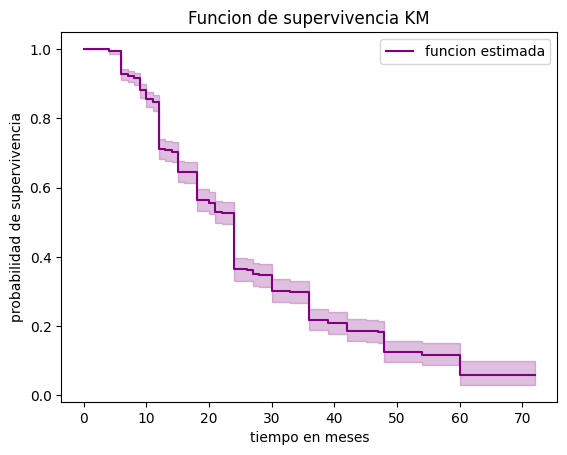

In [372]:
kmbil.plot_survival_function(label = 'funcion estimada', color= 'purple')
plt.title('Funcion de supervivencia KM')
plt.xlabel('tiempo en meses')
plt.ylabel('probabilidad de supervivencia');

1. Cuál es la mediana del tiempo y que significa

In [373]:
#mediana de tiempo de supervivencia
med_kmbilt = kmbil.median_survival_time_
med_kmbilp = np.median(kmbil.survival_function_)


print(f'El valor de la mediana es de  {med_kmbilt.round(4)} con una probabilidad de {med_kmbilp.round(4)}.\nEsto nos indica el tiempo en el cual la curva cambia de una probabilidad de supervivencia mayor de 0,5 a una menor de 0,5.\nPor los resultados obtenidos tenemos que el tiempo en el que la probabilidad de que un cliente pague va decreciendo es de {med_kmbilt}');

El valor de la mediana es de  24.0 con una probabilidad de 0.5279.
Esto nos indica el tiempo en el cual la curva cambia de una probabilidad de supervivencia mayor de 0,5 a una menor de 0,5.
Por los resultados obtenidos tenemos que el tiempo en el que la probabilidad de que un cliente pague va decreciendo es de 24.0


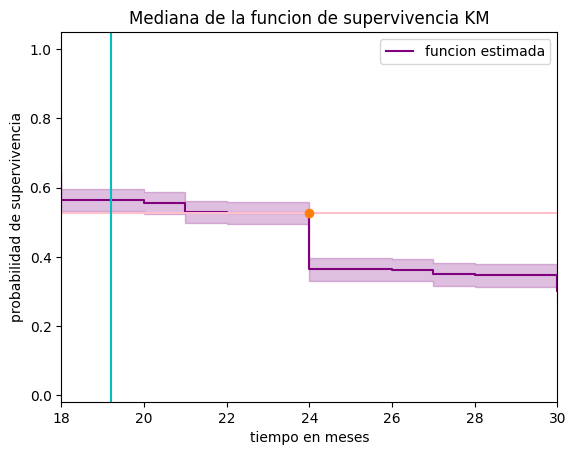

In [374]:
#grafica
kmbil.plot_survival_function(label = 'funcion estimada', color= 'purple')
plt.title('Mediana de la funcion de supervivencia KM')
plt.axhline(y = med_kmbilp, color = 'pink', linestyle = '-')
plt.axvline(label = 'tiempo promedio en pagar el préstamo en su totalidad',x = pt, color = '#00BFBF', linestyle = '-')
plt.plot(med_kmbilt,med_kmbilp,marker ="o")
plt.xlabel('tiempo en meses')
plt.ylabel('probabilidad de supervivencia')
plt.xlim(18,30);

2. Es mayor/menor que el tiempo promedio del inciso 1c

In [375]:
print(f'El tiempo promedio de la funcion de riesgo es de {med_kmbilt.round(4)} el cual es mayor al tiempo promedio {pt} como se puede observar en la grafica anterior\nDonde la linea azul representa el tiempo promedio {pt} y la linea rosa la probabilidad {med_kmbilp.round(4)} la cual intersecta en un tiempo de {med_kmbilt.round(4)}')

El tiempo promedio de la funcion de riesgo es de 24.0 el cual es mayor al tiempo promedio 19.21 como se puede observar en la grafica anterior
Donde la linea azul representa el tiempo promedio 19.21 y la linea rosa la probabilidad 0.5279 la cual intersecta en un tiempo de 24.0


## Determinar el tipo de riesgo de que el préstamo se pague en su totalidad 

Determine si el riesgo de que el préstamo se pague en su totalidad es constante, creciente, decreciente, o tipo log-normal respecto al tiempo

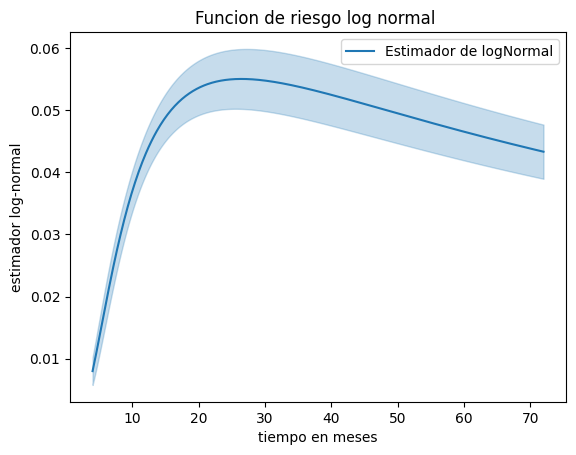

In [376]:
#log-normal
lognbil = LogNormalFitter().fit(bil['meses'],bil['credito_pagado'])
lognbil.plot_hazard(label='Estimador de logNormal')
plt.title('Funcion de riesgo log normal ')
plt.xlabel('tiempo en meses')
plt.ylabel('estimador log-normal');

In [377]:
#constante (exponencial)
expbil = ExponentialFitter().fit(bil['meses'],bil['credito_pagado'])
expbil.hazard_

,Exponential_estimate
4.000000,0.033488
4.136273,0.033488
4.272545,0.033488
4.408818,0.033488
4.545090,0.033488
...,...
71.454910,0.033488
71.591182,0.033488
71.727455,0.033488
71.863727,0.033488


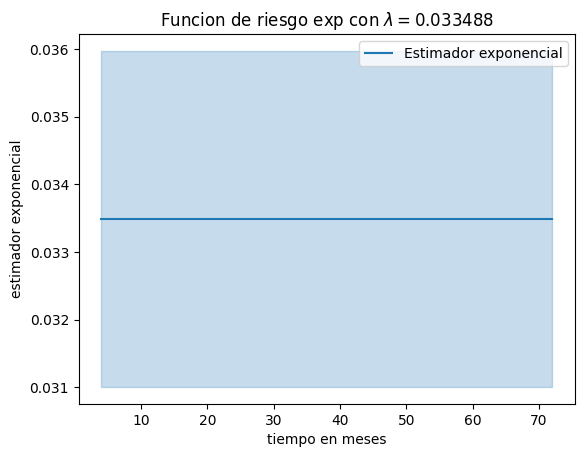

In [378]:

expbil.plot_hazard(label='Estimador exponencial')
plt.title('Funcion de riesgo exp con $\lambda=0.033488$')
plt.xlabel('tiempo en meses')
plt.ylabel('estimador exponencial');

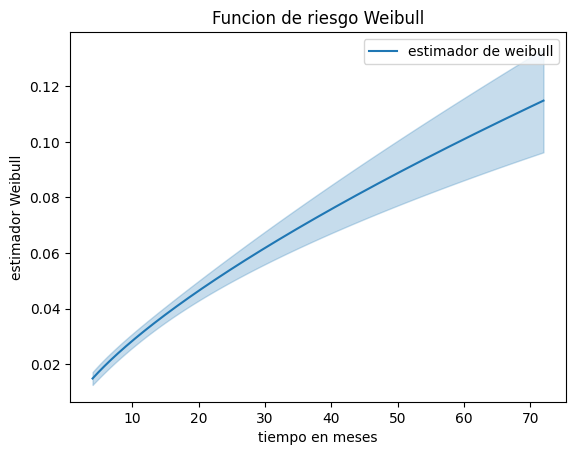

In [379]:
#creciente (weibull)
weibullbil = WeibullFitter().fit(bil['meses'],bil['credito_pagado'])
weibullbil.plot_hazard(label='estimador de weibull')
plt.title('Funcion de riesgo Weibull')
plt.xlabel('tiempo en meses')
plt.ylabel('estimador Weibull');

In [380]:
print('Exp: ',expbil.AIC_.round(2),', weibul ', weibullbil.AIC_.round(2),', log-normal ', lognbil.AIC_.round(2))

Exp:  6157.19 , weibul  5900.98 , log-normal  5813.75


In [381]:
#respuesta
print(f'Al contar con un estimado AIC de {lognbil.AIC_.round(2)} (menor al de los otros estimadores) se obtiene que la funcion de riesgo se adapta mejor a un modelo lognormal\nLa distribución log-normal se distingue por mostrar un aumento rápido al principio, seguido de una fase de estabilidad con el paso del tiempo.\nEn el gráfico, se nota que al principio, la distribución log-normal experimenta un crecimiento significativo hasta aproximadamente el mes 20,\ny luego se mantiene constante antes de disminuir.')

Al contar con un estimado AIC de 5813.75 (menor al de los otros estimadores) se obtiene que la funcion de riesgo se adapta mejor a un modelo lognormal
La distribución log-normal se distingue por mostrar un aumento rápido al principio, seguido de una fase de estabilidad con el paso del tiempo.
En el gráfico, se nota que al principio, la distribución log-normal experimenta un crecimiento significativo hasta aproximadamente el mes 20,
y luego se mantiene constante antes de disminuir.


## Modelo Cox

1.  A parte de “tasa de interes” y “cantidad”, elige otras cuatro variables que creas que afectan el riesgo del evento

**Variables en total**
1. Tasa de interes 
2. cantidad
3. Edad 
4. Numero de creditos
5. situacion laboral
6. historia crediticia	

2. Di si cada una de las 6 variables que elegiste, aumentan/disminuyen el riesgo del evento y por qué


*suposiciones*
 1. Tasa de interes:
 Entre menor sea la tasa de interes aumenta el riesgo de que el cliente pague el prestamo. Esto debido a que si los intereses generados son menores la deuda no se hara tan grande y por tanto sera mas accesible de pagar 


 2. cantidad:
 Si la cantidad del prestamo es muy alta el riesgo de que el cliente pague en su totalidad disminuye. Esto debido a que si la cantidad prestada al usuario es muy grande, tardara mas tiempo en que se pueda pagar en su totalidad


 3. Edad:
 La edad del usuario aumenta el riesgo de que el cliente pague en su totalidad. Debido a que si el usuario se encuentra en una edad en la que pueda laborar puede tener ingresos para cubrir la deuda adquirida


 4. Numero de creditos:
 Un numero grande de creditos adquiridos disminuye el riesgo de que el cliente pague en su totalidad. Puesto que tener varias deudad produce que la persona no sea capaz de pagar todas


 5. Situacion laboral:
La situacion laboral de una persona disminuye el riesgo de que el cliente pague en su totalidad. Puesto que la situacion laoral va ligada diretamente a el salario que se va a obtener y en caso de no tener un salario alto, la probabilidad de que el usuario pague disminuye


 6. historia crediticia:
 El historial crediticio puede llegar a disminuir el riesgo de que el cliente pague en su totalidad. Puesto que el presentar deudas impagadas implica que puede que no se tenga la solvencia para pagar una nueva deuda.


3. Realiza las transformaciones adecuadas para utilizar las variables en un modelo de cox

In [382]:
#modelado de la base de datos 
variables = ['meses','credito_pagado','tasa_de_interes','cantidad','edad','numero_creditos','situacion_laboral','historia_crediticia']
bil_f= bil[variables]

In [390]:
bil_f.head(3)

,meses,credito_pagado,tasa_de_interes,cantidad,edad,numero_creditos,desempleado,gobierno,obrero,pago_algun_credito,pago_retrasado,pago_todos,sin_creditos
0,6,1,4,1169,67,2,0,1,0,0,0,0,0
1,48,0,2,5951,22,1,0,1,0,1,0,0,0
2,12,1,2,2096,49,1,0,0,1,0,0,0,0


In [384]:
#verificar la existencia de missin values 
bil_f.isnull().sum()

meses                  0
credito_pagado         0
tasa_de_interes        0
cantidad               0
edad                   0
numero_creditos        0
situacion_laboral      0
historia_crediticia    0
dtype: int64

In [385]:
#verificacion de valores duplicados
bil_f.duplicated().sum()

0

In [386]:
#verifcar que sean variable numericas
bil_f.dtypes

meses                   int64
credito_pagado          int64
tasa_de_interes         int64
cantidad                int64
edad                    int64
numero_creditos         int64
situacion_laboral      object
historia_crediticia    object
dtype: object

In [387]:
# dummie situacion laboral
dum_sl = pd.get_dummies(bil_f['situacion_laboral'],drop_first=True,dtype=int) #se elimino administrativo

bil_f = pd.concat([bil_f,dum_sl],axis = 1)
bil_f = bil_f.drop('situacion_laboral',axis=1)

#dummie historial crediticio
dum_hc = pd.get_dummies(bil_f['historia_crediticia'],drop_first=True,dtype=int) #se elimino no ha pagado

bil_f = pd.concat([bil_f,dum_hc],axis = 1)
bil_f = bil_f.drop('historia_crediticia',axis=1)

In [388]:
#base de datos final 
bil_f.head()

,meses,credito_pagado,tasa_de_interes,cantidad,edad,numero_creditos,desempleado,gobierno,obrero,pago_algun_credito,pago_retrasado,pago_todos,sin_creditos
0,6,1,4,1169,67,2,0,1,0,0,0,0,0
1,48,0,2,5951,22,1,0,1,0,1,0,0,0
2,12,1,2,2096,49,1,0,0,1,0,0,0,0
3,42,1,2,7882,45,1,0,1,0,1,0,0,0
4,24,0,3,4870,53,2,0,1,0,0,1,0,0


4. Estima un modelo de cox con las variables elegidas e interpreta los coeficientes.

In [389]:
#estimando el modelo de COX 
cphbil = CoxPHFitter().fit(bil_f, 'meses', 'credito_pagado')
cphbil.print_summary()

<lifelines.CoxPHFitter: fitted with 1000 total observations, 300 right-censored observations>
             duration col = 'meses'
                event col = 'credito_pagado'
      baseline estimation = breslow
   number of observations = 1000
number of events observed = 700
   partial log-likelihood = -4028.69
         time fit was run = 2023-10-07 17:01:02 UTC

---
                     coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                  
tasa_de_interes     -0.45       0.64       0.04            -0.52            -0.37                 0.59                 0.69
cantidad            -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
edad                 0.01       1.01       0.00             0.01             0.02                 1.01                 1.02
numero_creditos      0.03       1.03       0.08            -0.13             0.19                 0.87                 1.21
desempleado         -0.63       0.53       0.29            -1.21            -0.06                 0.30                 0.94
gobierno            -0.26       0.77       0.11            -0.48            -0.03                 0.62                 0.97
obrero              -0.01       0.99       0.14            -0.28             0.25                 0.76                 1.29
pago_algun_credito  -0.38       0.68       0.10            -0.58            -0.18                 0.56                 0.84
pago_retrasado      -0.57       0.56       0.15            -0.86            -0.29                 0.42                 0.75
pago_todos          -1.00       0.37       0.24            -1.46            -0.53                 0.23                 0.59
sin_creditos        -1.06       0.35       0.27            -1.58            -0.53                 0.21                 0.59

                     cmp to      z      p   -log2(p)
covariate                                           
tasa_de_interes        0.00 -11.90 <0.005     106.03
cantidad               0.00 -16.03 <0.005     189.77
edad                   0.00   3.71 <0.005      12.26
numero_creditos        0.00   0.35   0.72       0.47
desempleado            0.00  -2.16   0.03       5.04
gobierno               0.00  -2.22   0.03       5.23
obrero                 0.00  -0.10   0.92       0.12
pago_algun_credito     0.00  -3.66 <0.005      11.98
pago_retrasado         0.00  -3.92 <0.005      13.44
pago_todos             0.00  -4.21 <0.005      15.24
sin_creditos           0.00  -3.95 <0.005      13.67
---
Concordance = 0.79
Partial AIC = 8079.38
log-likelihood ratio test = 481.39 on 11 df
-log2(p) of ll-ratio test = 317.33

In [391]:
#coeficientes sin redondear
cphbil.params_

covariate
tasa_de_interes      -0.448345
cantidad             -0.000391
edad                  0.012856
numero_creditos       0.029649
desempleado          -0.632440
gobierno             -0.255050
obrero               -0.014032
pago_algun_credito   -0.378678
pago_retrasado       -0.574573
pago_todos           -0.996219
sin_creditos         -1.059083
Name: coef, dtype: float64

In [392]:
#exp(coef) sin redondear
cphbil.hazard_ratios_

covariate
tasa_de_interes       0.638684
cantidad              0.999609
edad                  1.012939
numero_creditos       1.030093
desempleado           0.531294
gobierno              0.774878
obrero                0.986066
pago_algun_credito    0.684766
pago_retrasado        0.562945
pago_todos            0.369273
sin_creditos          0.346774
Name: exp(coef), dtype: float64

1. **Tasa de interes**: Al tener un p- valor: <0.005. Es menor a $\alpha = 0.05$, por lo que rechazamos H0. 

Es decir el *porcentaje de la tasa de interes*, **si** tiene efecto sobre el riesgo de que una persona pague el prestamo en su totalidad. 
El porcentaje de la tasa de interes **disminuye** el riesgo de pago total en un **36%**


2. **cantidad**: Al tener un p- valor: <0.005. Es menor a $\alpha = 0.05$,, por lo que rechazamos H0. Es decir la *cantidad del prestamo* evaluado en euros, **si** tiene efecto sobre el riesgo de que una persona pague el prestamo en su totalidad. 
La cantidad del prestamo **disminuye** el riesgo de pago total en un **0.0391%**


3. **Edad**:  Al tener un p- valor: <0.005. Es menor a $\alpha = 0.05$,, por lo que rechazamos H0. Es decir la *edad* de la persona que adqiere el prestamo, **si** tiene efecto sobre el riesgo de que una persona pague el prestamo en su totalidad. 
La edad **aumenta** el riesgo de pago total en un **1%**


4. **Numero de creditos**: Al tener un p- valor: 0.72. Es mayor a $\alpha = 0.05$,, por lo que NO rechazamos H0. Es decir el *numero de creditos* que tiene un usuario, **NO** tiene efecto sobre el riesgo de que una persona pague el prestamo en su totalidad. 


5. **desempleado**:Al tener un p- valor: 0.03. Es menor a $\alpha = 0.05$,, por lo que rechazamos H0. Es decir el ser *desempleado* , **si** tiene efecto sobre el riesgo de que una persona pague el prestamo en su totalidad en comparacion a que la persona fuera *administrativo*. 
Ser desempleado **disminuye** el riesgo de pago total en un **47%** en comparacion a que fuera del departamento administrativo


6. **gobierno**:Al tener un p- valor: 0.03. Es menor a $\alpha = 0.05$,, por lo que rechazamos H0. Es decir el ser empleado del *gobierno* , **si** tiene efecto sobre el riesgo de impago en comparacion a que la persona fuera *administrativo*. 
Ser empleado del gobierno  **disminuye** el riesgo de pago total en un **23%** en comparacion a que fuera del departamento administrativo


7. **Obrero**: Al tener un p- valor: 0.92. Es mayor a $\alpha = 0.05$,, por lo que NO rechazamos H0. Es decir ser *obrero*, **NO** tiene efecto sobre el riesgo de que una persona pague el prestamo en su totalidad, en comparacion a ser administrativo.  


8. **pago algun credito**: Al tener un p- valor: <0.005>. Es menor a $\alpha = 0.05$,, por lo que rechazamos H0. Es decir el haber *pagado algun credito* , **si** tiene efecto sobre el riesgo de que una persona pague el prestamo en su totalidad en comparacion a que la persona *no hubiera pagado*. 
Haber pagado algun credito  **disminuye** el riesgo de pago total en un **32%** en comparacion a que no se hubiera pagado


9. **pago retrasado**: Al tener un p- valor: <0.005>. Es menor a $\alpha = 0.05$,, por lo que rechazamos H0. Es decir el haber *pagado con retraso* , **si** tiene efecto sobre el riesgo de que una persona pague el prestamo en su totalidad en comparacion a que la persona *no hubiera pagado*. 
Haber pagado con retraso  **disminuye** el riesgo de pago total en un **44%** en comparacion a que no se hubiera pagado


10. **pago todos**: Al tener un p- valor: <0.005>. Es menor a $\alpha = 0.05$,, por lo que rechazamos H0. Es decir el haber *pagado todos los creditos* , **si** tiene efecto sobre el riesgo de que una persona pague el prestamo en su totalidad en comparacion a que la persona *no hubiera pagado*. 
Haber pagado los creditos  **disminuye** el riesgo de pago total en un **63%** en comparacion a que no se hubiera pagado


11. **sin creditos**: Al tener un p- valor: <0.005>. Es menor a $\alpha = 0.05$,, por lo que rechazamos H0. Es decir el *no tener creditos* , **si** tiene efecto sobre el riesgo de que una persona pague el prestamo en su totalidad en comparacion a que la persona *no hubiera pagado*. 
El no haber tenido creditos  **disminuye** el riesgo de pago total en un **65%** en comparacion a que no se hubiera pagado

## Analisis, reflexiones y recomendaciones

En el análisis previamente realizado, se logro examinar una base de datos con 1000 observaciones y 21 variables. Dicha base de datos nos habla sobre la información que tiene un banco acerca de los préstamos otorgados a sus clientes. De dicha base de datos, pudimos determinar que en promedio el Banco de la Ilusión otorga en promedio 3271.26 euros. Donde aproximadamente se toma un tiempo de 19.21 meses en pagar el préstamo en su totalidad. De la misma manera los clientes se pueden dividir entres las personas que ya han pagado su préstamo y las que aún no lo hacen, logrando obtener que el promedio del monto de los prestamos es menor en gente que ya pago la deuda en su totalidad que los que aun no lo hacen. Por otra parte, vemos lo mismo con la tasa de interés, donde se tiene una tasa de 2.92% en personas que ya liquidaron su deuda y una tasa de 3.1% en personas que aun no lo hacen, por lo que esto nos da un indicio de que estas variables pueden llegar a tener una influencia en el pago de un préstamo. 

Como resultado de la aplicación del modelo de Kaplan-Meier, nos introdujimos en la búsqueda de la mediana del tiempo de la función de supervivencia, lo cual nos arrojo un tiempo de 24 meses con una probabilidad de sobrevivir al riesgo de pagar la deuda en su totalidad de 0.5279. Lo que nos indica que pasado los 24 meses la probabilidad de pagar un préstamo en su totalidad va disminuyendo. 

Pasando a la examinación del riesgo de que el préstamo se pague en su totalidad se dio a conocer que sigue un modelo log-normal, en el cual podemos ver como el riesgo se presenta creciente hasta un tiempo aproximado de 20 meses, donde procede a volverse constante por un corto periodo de tiempo y después decrece. Lo cual se interpreta como que en los primeros 20 meses la probabilidad de que se pague un préstamo en su totalidad va en aumento, para después dar paso a decrecer.

Teniendo en cuenta las variables de tasa de interés, cantidad, edad, número de créditos, situación laboral e historial crediticio. Se puede dar ciertas recomendaciones:
1.	Hacer una evaluación de los porcentajes y los montos que están teniendo los clientes, puesto que por la prueba de Cox se pudo notar que hay una influencia en el riesgo de que una persona pague toda su deuda. Se recomienda prestar esencial atención en la tasa de interés, puesto que tiene una influencia de 36%
2.	Por otra parte, revisar la situación del cliente es esencial para ayudar a aumentar los pagos de los préstamos, puesto que algunas situaciones laborales pueden llegar a disminuir el riesgo de pago total, tal como trabajar en el gobierno, ya que disminuye el riesgo en un 23% respecto a que fuera parte del sector administrativo
3.	El historial crediticio de los clientes también tiene que tratarse con precaución, puesto que los diferentes estados (pago retrasado, sin créditos etc.…) pueden disminuir el riesgo de pago total en porcentajes muy significativos, como lo es el estado de **sin créditos** el cual disminuye el riesgo de pago total en un 65% respecto a las personas que no han pagado 
